In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-4.0, 4.0, 100)

In [9]:
X, Y = np.meshgrid(xlist, ylist)
Z = Y ** 2 / 2 - 5 * np.cos(X)

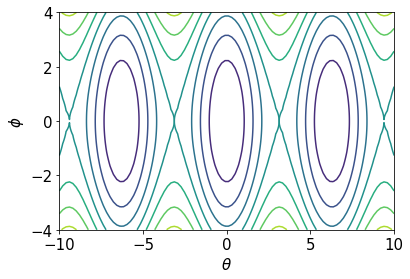

In [11]:
plt.figure()
plt.contour(X, Y, Z)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$\phi$', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

Um gráfico de contorno para o sistema

Os eixos são o deslocamento angular (θ) e a velocidade angular (θ̇). As curvas fechadas em torno dos pontos críticos (2nπ, 0) representam oscilações periódicas, e as linhas onduladas para grandes velocidades angulares


In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def fun(x, y):
    return y ** 2 / 2 - 5 * np.cos(x)

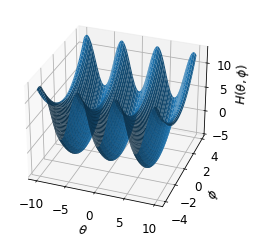

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-4.0, 4.0, 0.1)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$\phi$', fontsize=12)
ax.set_zlabel(r'$H(\theta,\phi)$', fontsize=12)
plt.tick_params(labelsize=12)
ax.view_init(30, -70)
plt.show()

# The Rossler chaotic attractor


In [20]:
def Rossler(x, y, z, a = 0.2, b=0.2, c=6.3):
    x_dot = -y-z
    y_dot = x + a * y
    z_dot = b + x * z - c * z
    
    return x_dot, y_dot, z_dot

In [21]:
dt = 0.01
step_count = 50000

In [22]:
xs=np.empty((step_count + 1,))
ys=np.empty((step_count + 1,))
zs=np.empty((step_count + 1,))

In [23]:
# As condições iniciais.
xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)

In [24]:
# Iteração.
for i in range(step_count):
    x_dot, y_dot, z_dot = Rossler(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + (x_dot*dt)
    ys[i+1] = ys[i] + (y_dot*dt)
    zs[i+1] = zs[i] + (z_dot*dt)

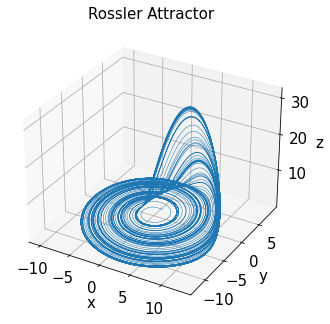

In [27]:
fig=plt.figure()
ax=Axes3D(fig)

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Rossler Attractor', fontsize=15)
plt.show()

# The Lorenz attractor

In [28]:
from scipy.integrate import odeint

In [30]:
# Parâmetros de Lorenz e condições iniciais
sigma, beta, rho = 10, 2.667, 28
x0, y0, z0 = 0, 1, 1.05

# Ponto de tempo máximo e número total de pontos de tempo
tmax, n = 100, 10000

In [31]:
def Lorenz(X, t, sigma, beta, rho):
    """ Equações de Lorenz"""
    x, y, z = X
    dx = -sigma * (x-y)
    dy = rho * x - y - x * z
    dz = -beta * z + x * y
    
    return dx, dy, dz

In [33]:
# Integração da equação de Lorenz
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
x, y, z = f.T

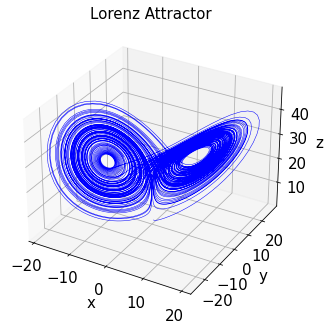

In [34]:
# Plote atrator de Lorenz usando uma projeção 3D Matplotlib
fig=plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z, 'b-', lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Lorenz Attractor', fontsize=15)
plt.show()

# Animação de uma bifurcação do circuito Chua

In [64]:
from matplotlib.animation import ArtistAnimation

In [65]:
fig=plt.figure()

mo = -1/7
m1 = 2/7
tmax = 100;

def chua(x, t):
    return [a * (x[1] - (m1 * x[0] + (mo - m1) / 2 *
    (np.abs(x[0] + 1) - \
    np.abs(x[0] - 1)))), x[0] - x[1] + x[2], -15 * x[1]]

<Figure size 432x288 with 0 Axes>

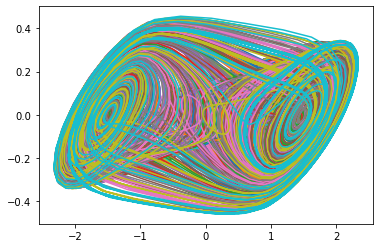

In [66]:
time = np.arange(0, tmax, 0.1)
x0=[1.96, -0.0519, -3.077]
myimages = []
for a in np.arange(8, 11, 0.1):
    xs = odeint(chua, x0, time)
    imgplot = plt.plot(xs[:, 0], xs[:, 1])
    myimages.append(imgplot)

In [67]:
my_anim = ArtistAnimation(fig, myimages, interval=500, blit=False, repeat_delay=500)
plt.show()